# Case 2 notebook VERSION 3

This model was based on the version 2 model: it still uses VGG16 and data augmentation methods. The purpose of version 3 is to examine the results of lowering the number of epochs from 100 to 25 to lessen model overfitting and see if test data results improve.

Please note that theoretical commentary and comments in general are largely left out as the code is covered already in notebook version 2. 

In [6]:
%pylab inline
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.metrics import Accuracy,FalseNegatives, FalsePositives
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

Populating the interactive namespace from numpy and matplotlib


In [7]:
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [9]:
base_dir = r'C:\Users\I\Desktop\Neural networks\Neural network data\Case2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [10]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [11]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
#Rescale Images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True,
    fill_mode='nearest')

#Rescale Images
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    #shuffle=False,
    class_mode='binary')

all_metrics = ['acc', FalseNegatives(), FalsePositives()] 

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-5),
            metrics=all_metrics)#metrics=['acc'])

Found 3512 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
history = model.fit_generator(
            train_generator,     
            epochs=11,
            validation_data=validation_generator)

Epoch 1/25
110/110 [==============================] - 82s 743ms/step - loss: 0.2733 - acc: 0.8784 - false_negatives: 126.0000 - false_positives: 301.0000 - val_loss: 0.2029 - val_acc: 0.9181 - val_false_negatives: 76.0000 - val_false_positives: 20.0000
Epoch 2/25
110/110 [==============================] - 73s 661ms/step - loss: 0.1723 - acc: 0.9334 - false_negatives: 108.0000 - false_positives: 126.0000 - val_loss: 0.1800 - val_acc: 0.9317 - val_false_negatives: 65.0000 - val_false_positives: 15.0000
Epoch 3/25
110/110 [==============================] - 72s 656ms/step - loss: 0.1493 - acc: 0.9433 - false_negatives: 97.0000 - false_positives: 102.0000 - val_loss: 0.3048 - val_acc: 0.8763 - val_false_negatives: 139.0000 - val_false_positives: 6.0000
Epoch 4/25
110/110 [==============================] - 73s 660ms/step - loss: 0.1388 - acc: 0.9465 - false_negatives: 89.0000 - false_positives: 99.0000 - val_loss: 0.1354 - val_acc: 0.9497 - val_false_negatives: 46.0000 - val_false_positives:

## Training and validation results
First, accurate graphs for test accuracy, loss, false positives and false negatives are displayed. Discussion of results proceeds after the graphs.

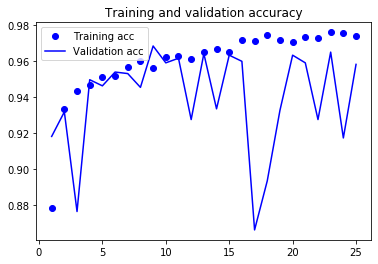

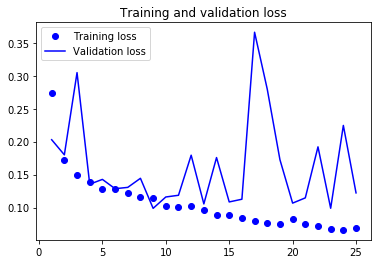

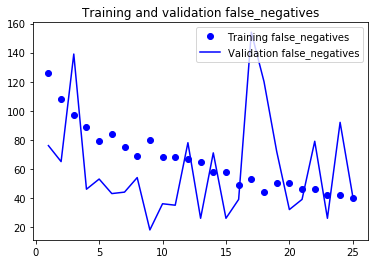

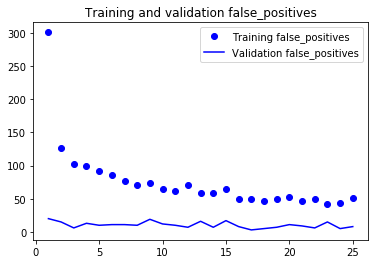

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
fn = history.history['false_negatives']
fn_v = history.history['val_false_negatives']
fp = history.history['false_positives']
fp_n = history.history['val_false_positives']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.plot(epochs, fn, 'bo', label='Training false_negatives')
plt.plot(epochs, fn_v, 'b', label='Validation false_negatives')
plt.title('Training and validation false_negatives')
plt.legend()
plt.figure()
plt.plot(epochs, fp, 'bo', label='Training false_positives')
plt.plot(epochs, fp_n, 'b', label='Validation false_positives')
plt.title('Training and validation false_positives')
plt.legend()
plt.show()

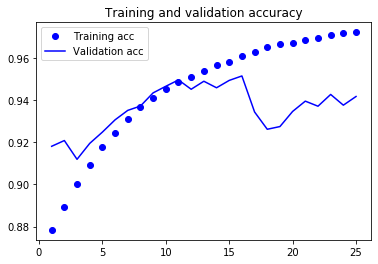

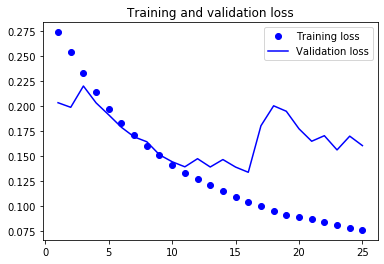

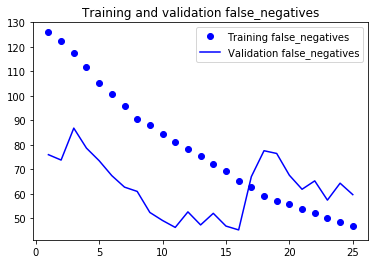

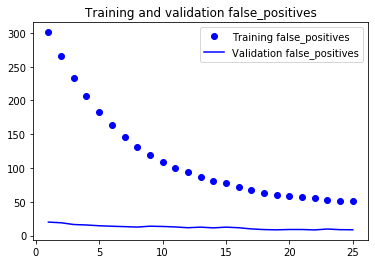

In [20]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs, smooth_curve(acc), 'bo', label='Training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(fn), 'bo', label='Training false_negatives')
plt.plot(epochs, smooth_curve(fn_v), 'b', label='Validation false_negatives')
plt.title('Training and validation false_negatives')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(fp), 'bo', label='Training false_positives')
plt.plot(epochs, smooth_curve(fp_n), 'b', label='Validation false_positives')
plt.title('Training and validation false_positives')
plt.legend()
plt.show()

### Discussion
It still seems that less epochs would give better results as many graphs show a optimal number of around 12 epochs for validation accuracy or loss. False negatives in predictions gain an increase around epoch 16, and both accuracy and loss gain an increase around epoch 11.

In [21]:
#Evaluate the data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
    class_mode='binary')
test_loss, test_acc, test_falseNegatives, test_falsePositives = model.evaluate_generator(test_generator)#test_generator
print('test acc:', test_acc)
print('test loss:', test_loss)
print('test false negatives',test_falseNegatives)
print('test false positives',test_falsePositives)
model.save('Case 2.V3.h5')

Found 1170 images belonging to 2 classes.
test acc: 0.96239316
test loss: 0.12254149362923124
test false negatives 38.0
test false positives 6.0


# Prediction / true values graph

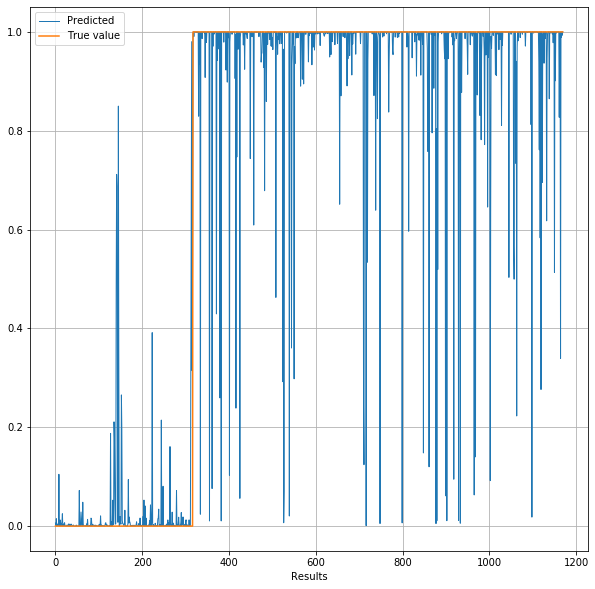

In [22]:
fig = plt.figure(figsize=(10, 10))
labels = test_generator.classes
prediction = model.predict_generator(test_generator).flatten()#, steps=50
plot(prediction, label='Predicted', linewidth=1)
plot(labels, label='True value')
legend()
xlabel('Results')
grid()

Compared to the Prediction/True value graph in V2, the V3 graph doesn't look better, in fact it looks worse than V2. V3 graph clearly contains more value deviation from 0 or 1. If you look at graph from the noise perspective V3 contains clearly more noise than V2.

In [23]:
cf_mx = confusion_matrix(labels, prediction > 0.25)
print("Confusion matrix: ")
print(cf_mx)
tn, fp, fn, tp = confusion_matrix(labels, prediction  > 0.25).ravel()
sensitivity = tp/(fn+tp)
specificity = tn/(fp+tn)
print("Sensitivity",sensitivity)
print("Specificity",specificity)
cl_rt = classification_report(labels, prediction > 0.25, target_names = ['Normal (0)', 'Pneumonia (1)'])
print(cl_rt)
#Sensitivity = TP / FN+TP
#Specificity = TN/FP+TN

# Confusion matrix:
# TN FP
# FN TP
# FN False Negative
# FP False Positive
# TN True Negative
# TP True Positive

# Precision = TP / Number of actually positive patients
# Recall = Sensitivity = TP / Number of model predicted positive patients

Confusion matrix: 
[[305  12]
 [ 29 824]]
Sensitivity 0.9660023446658851
Specificity 0.9621451104100947
               precision    recall  f1-score   support

   Normal (0)       0.91      0.96      0.94       317
Pneumonia (1)       0.99      0.97      0.98       853

     accuracy                           0.96      1170
    macro avg       0.95      0.96      0.96      1170
 weighted avg       0.97      0.96      0.97      1170



## Results

Results are very similar to version 3. There are very small dips in sensitivity, specificity and precision, discussed in the final block below. 

## Overall discussion on all versions

Looking at sensitivity and specificity of test predictions, it would look like version 2 model gave the best results (SENS 0.973; SPEC 0.974) compared to version 3 (SENS 0.966; SPEC 0.962). It is clear from the validation graphs, however, that version 2 is suffering from a small degree of overfitting. Nevertheless, the results are very accurate ALSO in version 3 without the possible suffering of overfitting. In this regard, model design team suggests using version 3. This is the case even when the f1-score is marginally lower in version 3 (0.94; 0.98) compared to version 2 (0.95; 0.98). This difference is so small that it would not compensate for the risk of overfitting the model. 

Later tests with even less epochs (11) showed that while maintaining same values of recall and accuracy, specificity went noticeably down, which is an indicator that the models should hold the number of epochs above that.